Importing necessary Libraries

In [41]:
import nltk
nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Load Dataset

In [42]:
df = pd.read_csv('/content/archive.zip')
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Visualize sentiment distribution

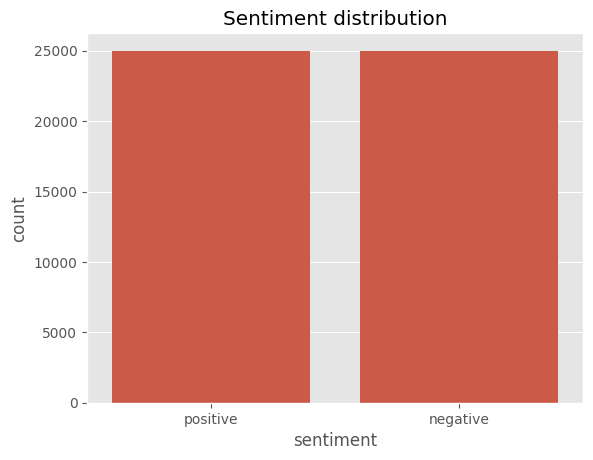

In [43]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")
plt.show()


Display first five reviews and their sentiments

In [44]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

Function to count the number of words in a text

In [45]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

Add word count column to the DataFrame

In [46]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


Plot histogram of word count for positive and negative reviews

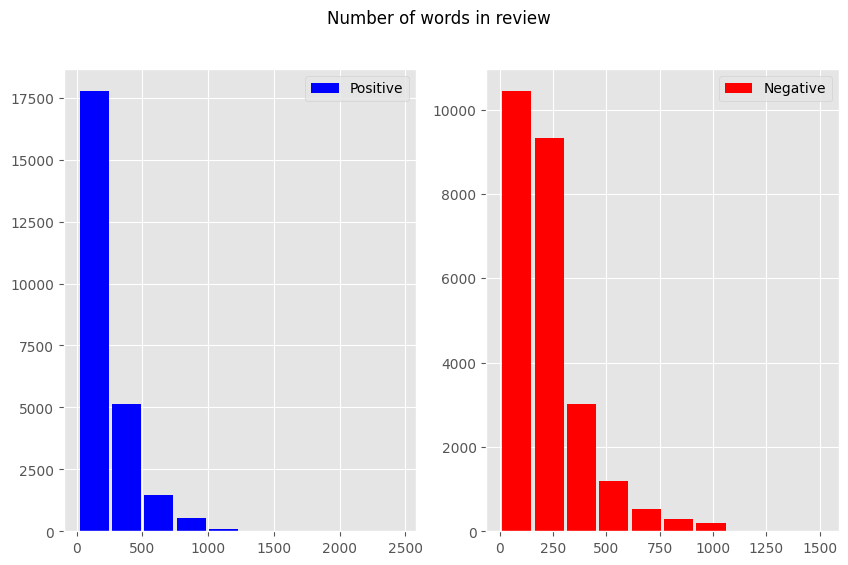

In [47]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

Plot histogram of review lengths for positive and negative reviews

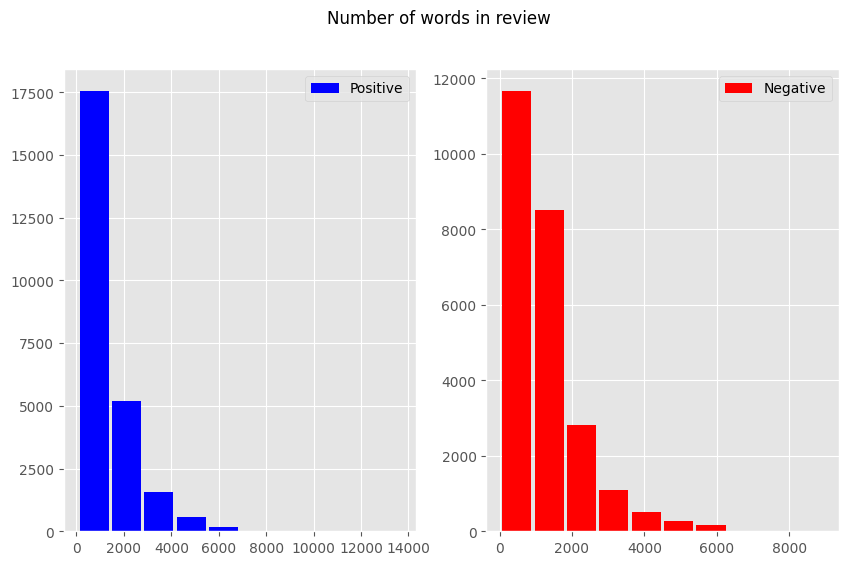

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in review")
plt.show()


Map sentiment labels to numerical values

In [49]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


Function to preprocess text

In [50]:
def data_processing(text):
    text = text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]','', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)


Apply text preprocessing

In [51]:
import nltk
nltk.download('punkt')
df.review = df['review'].apply(data_processing)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Check and remove duplicate entries

In [52]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)
df = df.drop_duplicates('review')

Number of duplicate entries:  421


Stemming function

In [53]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

Apply stemming to reviews

In [54]:
df.review = df['review'].apply(lambda x: stemming(x))

Update word count column

In [55]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


Visualize most frequent words in positive reviews

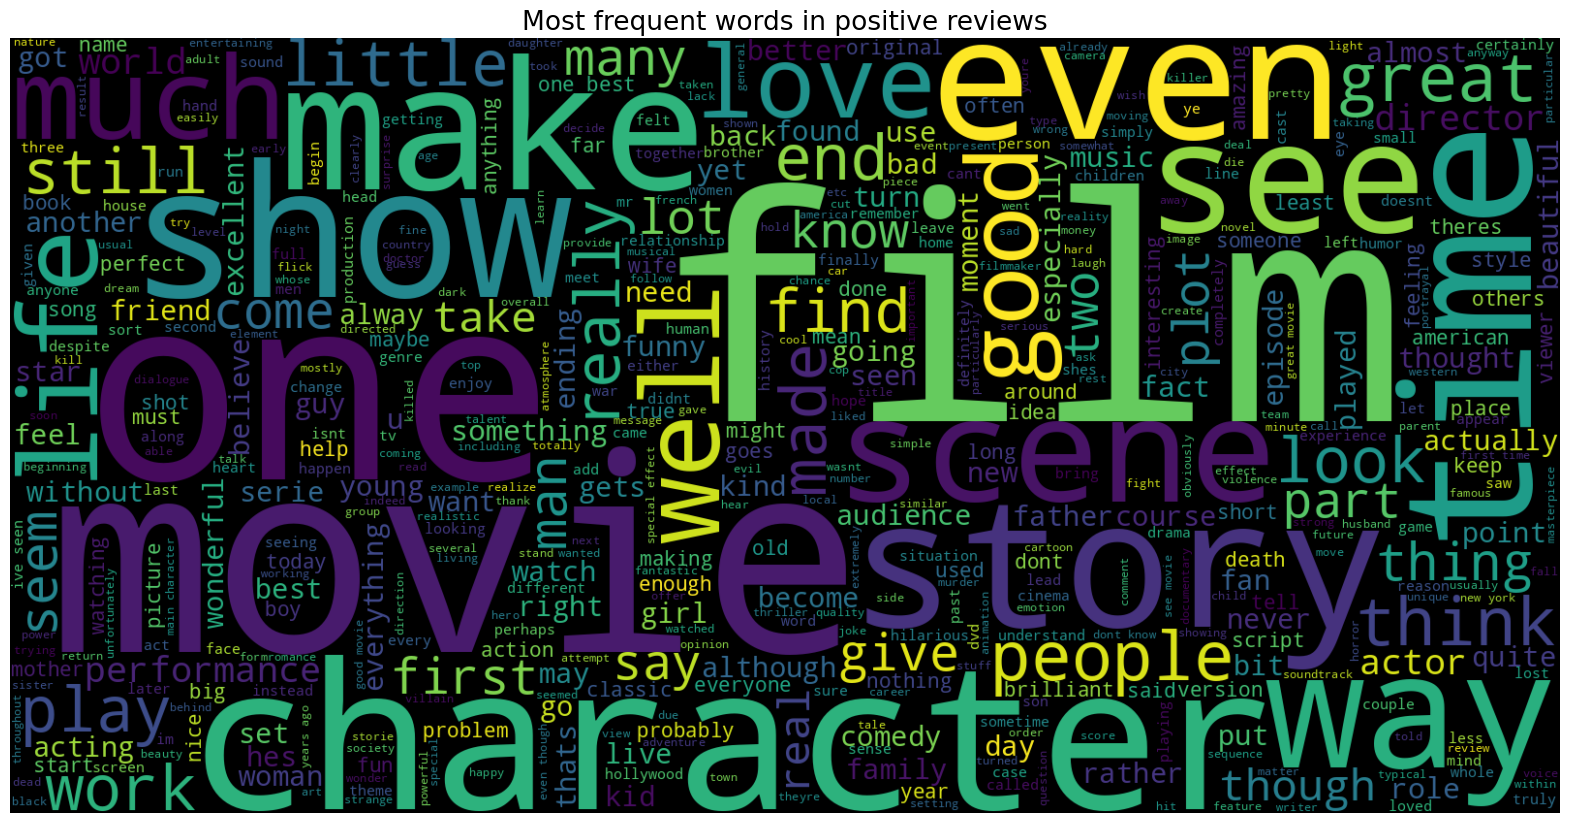

In [56]:
pos_reviews = df[df.sentiment ==1]
pos_reviews.head()
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()


Count the frequency of words in positive reviews

In [57]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)


[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

Create a DataFrame for the most common positive words and plot

In [58]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color='word')


Visualize most frequent words in negative reviews

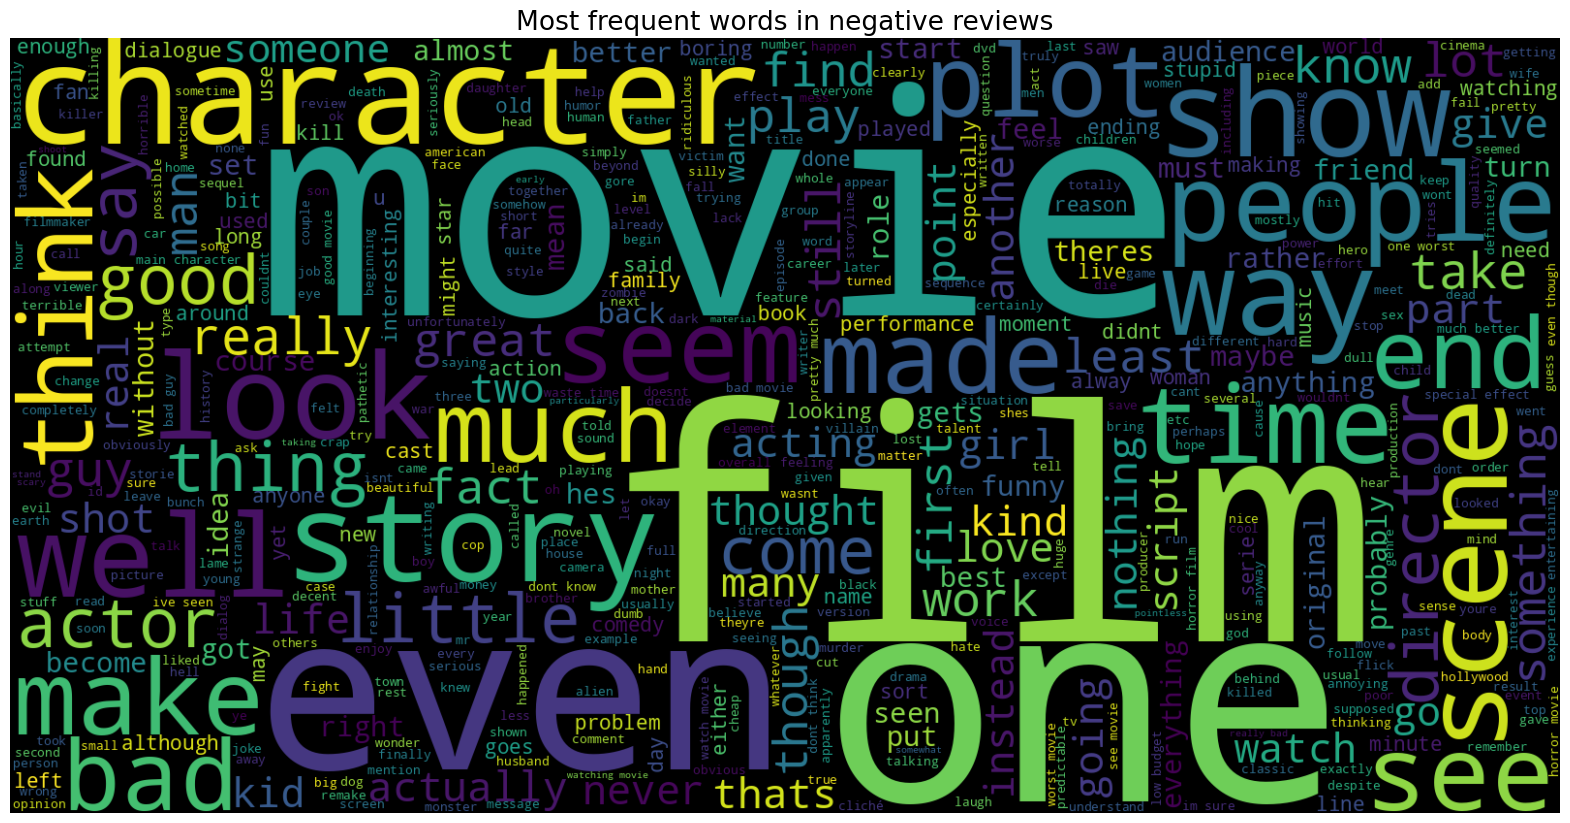

In [59]:
neg_reviews = df[df.sentiment == 0]
neg_reviews.head()
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()


Count the frequency of words in negative reviews

In [60]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

Create a DataFrame for the most common negative words and plot

In [61]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color='word')

Prepare data for modeling

In [62]:
X = df['review']
Y = df['sentiment']


Vectorize text data using TF-IDF

In [63]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

Split data into training and test sets

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 221707)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


Reduce the size of the training and test sets for faster training

In [65]:
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:500]
y_test = y_test[:500]
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2000, 221707)
Size of y_train:  (2000,)
Size of x_test:  (500, 221707)
Size of y_test:  (500,)


 Convert sparse matrices to dense arrays

In [66]:
x_train = x_train.toarray()
x_test = x_test.toarray()

Build the neural network model

In [67]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

Compile the model

In [68]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Train the model

In [69]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)



Epoch 1/15
200/200 [==============================] - 8s 38ms/step - loss: 0.6715 - accuracy: 0.7150
Epoch 2/15
200/200 [==============================] - 8s 42ms/step - loss: 0.5176 - accuracy: 0.9250
Epoch 3/15
200/200 [==============================] - 7s 35ms/step - loss: 0.2894 - accuracy: 0.9545
Epoch 4/15
200/200 [==============================] - 9s 43ms/step - loss: 0.1364 - accuracy: 0.9770
Epoch 5/15
200/200 [==============================] - 7s 36ms/step - loss: 0.0671 - accuracy: 0.9880
Epoch 6/15
200/200 [==============================] - 8s 41ms/step - loss: 0.0338 - accuracy: 0.9935
Epoch 7/15
200/200 [==============================] - 9s 43ms/step - loss: 0.0168 - accuracy: 0.9970
Epoch 8/15
200/200 [==============================] - 7s 37ms/step - loss: 0.0095 - accuracy: 0.9980
Epoch 9/15
200/200 [==============================] - 8s 40ms/step - loss: 0.0053 - accuracy: 0.9990
Epoch 10/15
200/200 [==============================] - 8s 38ms/step - loss: 0.0035 - accura

Display model summary

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                3547328   
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3547473 (13.53 MB)
Trainable params: 3547473 (13.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Evaluate the model on the test set

In [71]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)



16/16 [==============================] - 1s 29ms/step - loss: 0.4576 - accuracy: 0.8520
Test loss: 0.4576113522052765
Test accuracy: 0.8519999980926514


Plot training loss and accuracy

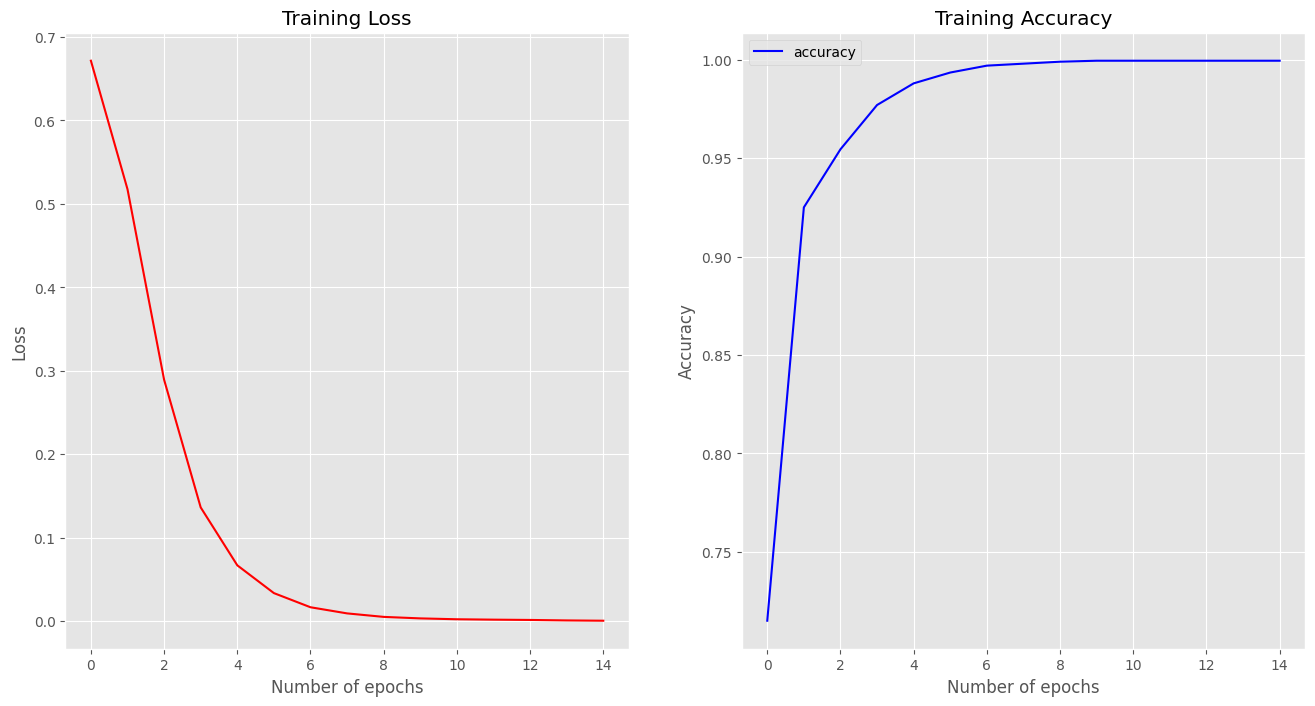

In [72]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Rebuild and recompile the model with Adam optimizer

In [73]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


 Train the model with Adam optimizer

In [74]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)


Epoch 1/15
200/200 [==============================] - 11s 47ms/step - loss: 0.6711 - accuracy: 0.6115
Epoch 2/15
200/200 [==============================] - 10s 52ms/step - loss: 0.3636 - accuracy: 0.9295
Epoch 3/15
200/200 [==============================] - 10s 48ms/step - loss: 0.0525 - accuracy: 0.9960
Epoch 4/15
200/200 [==============================] - 10s 49ms/step - loss: 0.0100 - accuracy: 0.9995
Epoch 5/15
200/200 [==============================] - 11s 53ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 6/15
200/200 [==============================] - 10s 48ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 7/15
200/200 [==============================] - 10s 48ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/15
200/200 [==============================] - 10s 49ms/step - loss: 8.6784e-04 - accuracy: 1.0000
Epoch 9/15
200/200 [==============================] - 10s 48ms/step - loss: 5.4832e-04 - accuracy: 1.0000
Epoch 10/15
200/200 [==============================] - 9s 47ms/step - loss

Display model summary

In [75]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                3547328   
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3547473 (13.53 MB)
Trainable params: 3547473 (13.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Evaluate the model on the test set

In [76]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

16/16 [==============================] - 1s 27ms/step - loss: 0.4173 - accuracy: 0.8400
Test loss: 0.417338103055954
Test accuracy: 0.8399999737739563


Plot training loss and accuracy

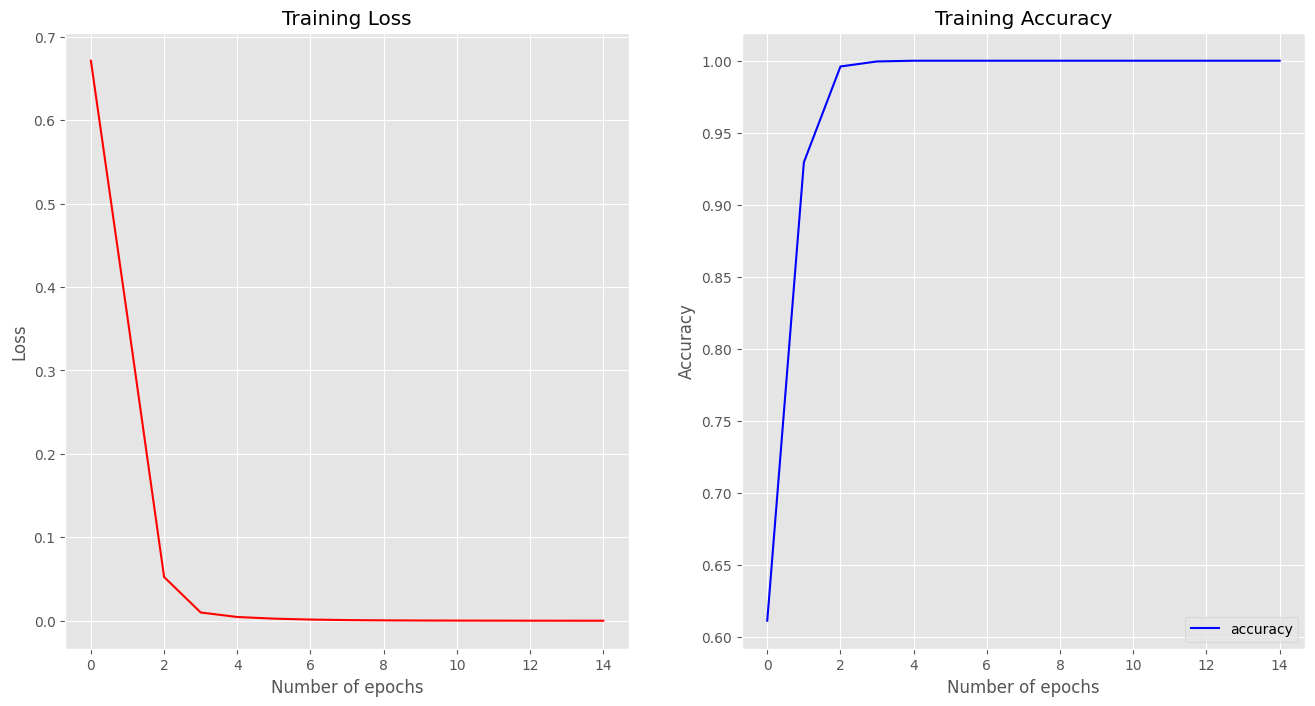

In [77]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()